In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import re
import string

from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import Embedding, GRU, Dense
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [6]:
data=pd.read_csv('C:/Users/canse/OneDrive/Masaüstü/turkish_movie_sentiment_dataset.csv')


In [7]:
data.head(5)

,comment,film_name,point
0,\n Jean Reno denince zate...,Sevginin Gücü,"5,0"
1,\n Ekşın falan izlemek is...,Sevginin Gücü,"5,0"
2,\n Bu yapım hakkında öyle...,Sevginin Gücü,"5,0"
3,\n finali yeter... (sting...,Sevginin Gücü,"5,0"
4,\n Jean Reno..\r\nbu adam...,Sevginin Gücü,"5,0"


In [8]:
data.shape

(83227, 3)

# VERİNİN GÖRSELLEŞTİRİLMESİ

Film puanları dağılımlarının yüzdelik dilimini görmek için Matplotlib kütüphanesini kullanabiliriz.

6.0
4.0


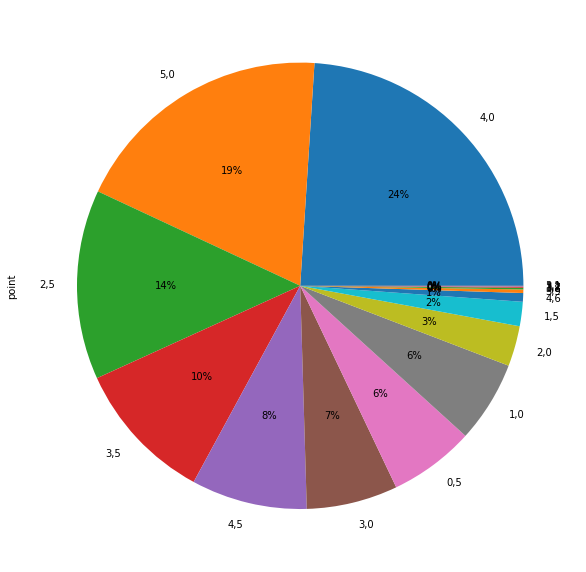

In [9]:
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plot_size[0] = 10
plot_size[1] = 15
plt.rcParams["figure.figsize"] = plot_size
data['point'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Burada film puanlarının dağılımını görüyoruz.Sayı bazlı sonuçları görmek için de Seaborn kütüphanesini kullanıyoruz.

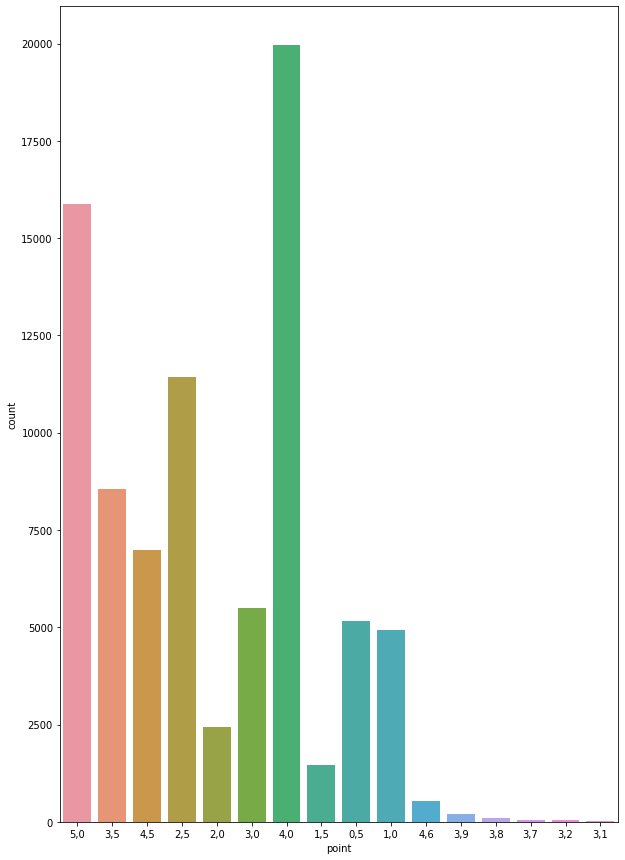

In [10]:
sns.countplot(data['point'])

# VERİNİN TEMİZLENMESİ

In [11]:
comments = lambda x : x[23:-24]

data["comment"] = data["comment"].apply(comments)
data["comment"].head()

0    Jean Reno denince zaten leon filmi gelir akla ...
1    Ekşın falan izlemek istiyorsanız eğer bunu izl...
2    Bu yapım hakkında öyle çok şey yazabilirim ki ...
3    finali yeter... (sting - shape of my heart)\r\...
4    Jean Reno..\r\nbu adam kusursuz biri..\r\nve o...
Name: comment, dtype: object

In [12]:
floatize = lambda x : float(x[0:-2])

data["point"] = data["point"].apply(floatize)
data["point"].value_counts()

4.0    27463
5.0    15873
3.0    14494
2.0    13866
1.0     6381
0.0     5150
Name: point, dtype: int64

In [13]:
data.drop(data[data["point"] == 3].index, inplace = True)
data["point"] = data["point"].replace(1, 0)
data["point"] = data["point"].replace(2, 0)
data["point"] = data["point"].replace(4, 1)
data["point"] = data["point"].replace(5, 1)
data["point"].value_counts()

1.0    43336
0.0    25397
Name: point, dtype: int64

In [14]:
data.reset_index(inplace = True)
data.drop("index", axis = 1, inplace = True)
data.head()

,comment,film_name,point
0,Jean Reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,1.0
1,Ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,1.0
2,Bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,1.0
3,finali yeter... (sting - shape of my heart)\r\...,Sevginin Gücü,1.0
4,Jean Reno..\r\nbu adam kusursuz biri..\r\nve o...,Sevginin Gücü,1.0


In [15]:
data["comment"] = data["comment"].apply(lambda x: x.lower())
data.head()

,comment,film_name,point
0,jean reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,1.0
1,ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,1.0
2,bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,1.0
3,finali yeter... (sting - shape of my heart)\r\...,Sevginin Gücü,1.0
4,jean reno..\r\nbu adam kusursuz biri..\r\nve o...,Sevginin Gücü,1.0


In [16]:
def remove_punctuation(text):
    no_punc = [words for words in text if words not in string.punctuation]
    word_wo_punc = "".join(no_punc)
    return word_wo_punc

data["comment"] = data["comment"].apply(lambda x: remove_punctuation(x))
data["comment"] = data["comment"].apply(lambda x: x.replace("\r", " "))
data["comment"] = data["comment"].apply(lambda x: x.replace("\n", " "))

data.head()

,comment,film_name,point
0,jean reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,1.0
1,ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,1.0
2,bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,1.0
3,finali yeter sting shape of my heart bazıl...,Sevginin Gücü,1.0
4,jean reno bu adam kusursuz biri ve oyunculug...,Sevginin Gücü,1.0


In [17]:
def remove_numeric(corpus):
    output = "".join(words for words in corpus if not words.isdigit())
    return output

data["comment"] = data["comment"].apply(lambda x: remove_numeric(x)) 
data.head()

,comment,film_name,point
0,jean reno denince zaten leon filmi gelir akla ...,Sevginin Gücü,1.0
1,ekşın falan izlemek istiyorsanız eğer bunu izl...,Sevginin Gücü,1.0
2,bu yapım hakkında öyle çok şey yazabilirim ki ...,Sevginin Gücü,1.0
3,finali yeter sting shape of my heart bazıl...,Sevginin Gücü,1.0
4,jean reno bu adam kusursuz biri ve oyunculug...,Sevginin Gücü,1.0


In [59]:
target = data["point"].values.tolist()
data = data["comment"].values.tolist()

cutoff = int(len(data)*0.80)

X_train, X_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [19]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(dataset)

In [20]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

print([X_train[1000]])
print(X_train_tokens[1000])

['film gerçekten bomba   çok komikti eğlenceli vakit geçirmek isteyen herkese öneririm  eddie murphy de gerçekten super oynamı']
[3, 35, 3225, 5, 1857, 128, 202, 672, 872, 269, 1641, 3232, 3495, 7, 35, 1327, 8852]


In [21]:
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)
num_tokens

array([14, 47, 96, ..., 21,  4, 51])

In [22]:
np.mean(num_tokens)

31.318813379308338

In [23]:
np.max(num_tokens)

3094

In [24]:
max_tokens = np.mean(num_tokens) + (2*np.std(num_tokens))
max_tokens = int(max_tokens)
max_tokens

141

In [25]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9741754324705746

In [68]:
X_train_pad = pad_sequences(X_train_tokens, maxlen = max_tokens) 
X_test_pad = pad_sequences(X_test_tokens, maxlen = max_tokens)

print(X_train_pad.shape)
print(X_test_pad.shape)

(54986, 141)
(13747, 141)


In [69]:
np.array(X_train_tokens[800])

array([  41,   36, 1864,  416,   54, 1824,  480,  355,   80,   33])

In [70]:
X_train_pad[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    5,   70,    1,    3,    4,
       5061, 4071,  851,    5,    5,   16,  527, 2370, 1105])

In [71]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token != 0]
    text = " ".join(words) # Kelimeler aralarında boşluk bırakılarak ard arda yazılacaktır.
    return text

In [72]:
tokens_to_string(X_train_tokens[350])

'bence gayet güzel bi filmdi her ne kadar kendi dışına yinede bence mükemmel bi oyunculuk ama her seyrettiğimde ayrı güzel bu filmide korku kategorisine hayret ettim doğrusu ne'

# MODEL OLUŞTURMA

In [73]:
embedding_size = 50
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = embedding_size, input_length = max_tokens, name = "embedding_layer"))
model.add(GRU(units = 16, return_sequences = True))
model.add(GRU(units = 8, return_sequences = True))
model.add(GRU(units = 4))
model.add(Dense(1, activation = "sigmoid"))

In [74]:
optimizer = Adam(lr = 1e-3)
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 141, 50)           500000    
_________________________________________________________________
gru_9 (GRU)                  (None, 141, 16)           3216      
_________________________________________________________________
gru_10 (GRU)                 (None, 141, 8)            600       
_________________________________________________________________
gru_11 (GRU)                 (None, 4)                 156       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 503,977
Trainable params: 503,977
Non-trainable params: 0
_________________________________________________________________


In [110]:
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)

model.fit(X_train_pad, y_train, epochs = 100, batch_size = 256)

Epoch 1/100
215/215 [==============================] - 55s 255ms/step - loss: 0.3182 - accuracy: 0.8890
Epoch 2/100
215/215 [==============================] - 54s 249ms/step - loss: 0.2966 - accuracy: 0.9012
Epoch 3/100
215/215 [==============================] - 54s 249ms/step - loss: 0.2795 - accuracy: 0.9109
Epoch 4/100
215/215 [==============================] - 53s 248ms/step - loss: 0.2603 - accuracy: 0.9207
Epoch 5/100
215/215 [==============================] - 57s 263ms/step - loss: 0.2474 - accuracy: 0.9263
Epoch 6/100
215/215 [==============================] - 53s 246ms/step - loss: 0.2389 - accuracy: 0.9301
Epoch 7/100
215/215 [==============================] - 55s 257ms/step - loss: 0.2321 - accuracy: 0.9333
Epoch 8/100
215/215 [==============================] - 56s 259ms/step - loss: 0.2255 - accuracy: 0.9360
Epoch 9/100
215/215 [==============================] - 56s 259ms/step - loss: 0.2144 - accuracy: 0.9411
Epoch 10/100
215/215 [==============================] - 53s 245m

In [111]:
y_pred = model.predict(X_test_pad[0:1000])
y_pred = y_pred.T[0]

In [112]:
cls_pred = np.array([1.0 if p > 0.5 else 0.0 for p in y_pred])
cls_true = np.array(y_test[0:1000])

In [113]:
incorrect = np.where(cls_pred != cls_true)
incorrect = incorrect[0]

In [114]:
len(incorrect)

314

In [138]:
idx = incorrect[20]
X_test[idx]

'ülkemizin tarihi ve bugünü bu tür sorunlarla okadar doluki sinemaya devamlı bu tarz öyküler çıkıyor kürt sorunu alevi sorunu darbeler içleri sonsuz hikayelerle dolu fakat sinema adına biraz ileriye dönük gelecekle ilgili hayaller ve öykülerle dolu filmlerinde olması gerekmiyormu geçmişi ve aynı konuları farklı öykülerden seyretmek ve türk sinemasının buralara sıkışıp kalması doğrumu geleceği düşünüp kurgulasak birazda fena mı olu'

In [139]:
y_pred[idx]

0.99925405

In [140]:
cls_true[idx]

0.0